<a href="https://colab.research.google.com/github/lenaviz/lenaviz/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install "jax[cpu]" -f https://storage.googleapis.com/jax-releases/jax_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html


In [ ]:
# Install necessary libraries if not already available
!pip install tensorflow scikit-learn matplotlib pandas

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
!ls '/content/drive/My Drive/winequality-red.csv'

'/content/drive/My Drive/winequality-red.csv'


In [9]:
file_path = '/content/drive/My Drive/folder_name/winequality-red.csv'


In [11]:
import pandas as pd

In [12]:
file_path = '/content/drive/My Drive/winequality-red.csv'
data = pd.read_csv(file_path, delimiter=';')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [13]:
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler

# Example for scaling features
features = data.drop('quality', axis=1)  # Dropping target column
target = data['quality']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
# Separate features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Neural Network Building

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model_1 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(10, activation='softmax')  # Assuming target values range from 0-9
])

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3914 - loss: 2.0223 - val_accuracy: 0.6055 - val_loss: 1.6917
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5891 - loss: 1.6032 - val_accuracy: 0.6133 - val_loss: 1.3252
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5507 - loss: 1.3394 - val_accuracy: 0.6406 - val_loss: 1.1286
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5520 - loss: 1.2207 - val_accuracy: 0.6523 - val_loss: 1.0379
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5573 - loss: 1.1402 - val_accuracy: 0.6562 - val_loss: 0.9863
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5597 - loss: 1.1121 - val_accuracy: 0.6562 - val_loss: 0.9560
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5742 - loss: 1.0701 - val_accuracy: 0.6641 - val_loss: 0.9382
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 1.0781 - val_accuracy: 0.6602 - val_loss:

In [20]:
# Evaluate on test data
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test)
print(f"Test Accuracy (Model 1): {test_accuracy_1}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5785 - loss: 0.9509  
Test Accuracy (Model 1): 0.565625011920929


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


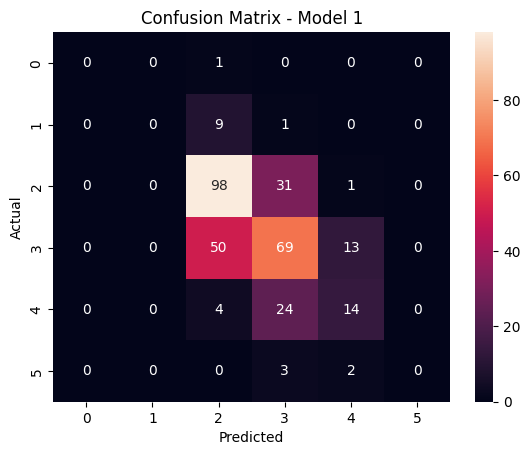

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_1 = model_1.predict(X_test).argmax(axis=1)

# Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
sns.heatmap(cm_1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model 1')
plt.show()

Defining Second Neural Network

In [22]:
# Double the parameters in hidden layers
model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1845 - loss: 2.2827 - val_accuracy: 0.4492 - val_loss: 1.7800
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5226 - loss: 1.6000 - val_accuracy: 0.6055 - val_loss: 1.2125
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5163 - loss: 1.1989 - val_accuracy: 0.6328 - val_loss: 1.0200
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5841 - loss: 1.0985 - val_accuracy: 0.6797 - val_loss: 0.9570
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5839 - loss: 1.0692 - val_accuracy: 0.6719 - val_loss: 0.9189
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5618 - loss: 1.0864 - val_accuracy: 0.6719 - val_loss: 0.8992
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 0.9258 - val_accuracy: 0.6758 - val_loss: 0.8918
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6183 - loss: 0.9881 - val_accuracy: 0.6914 - val_loss:

In [24]:
# Evaluate on test data for second model
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy (Model 2): {test_accuracy_2}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5745 - loss: 0.9322  
Test Accuracy (Model 2): 0.5718749761581421


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


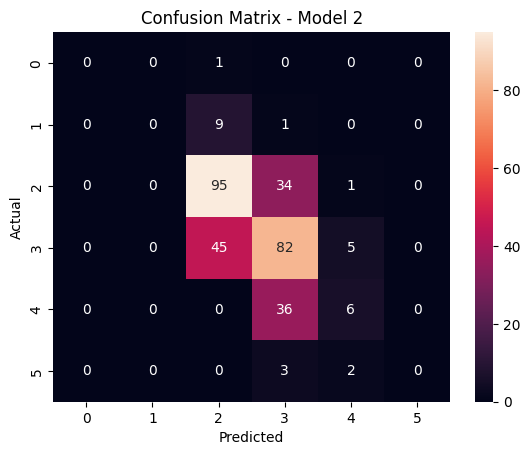

In [25]:
# Predict on the test set
y_pred_2 = model_2.predict(X_test).argmax(axis=1)

# Confusion Matrix
cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model 2')
plt.show()

In [26]:
print(f"Model 1 Accuracy: {test_accuracy_1}")
print(f"Model 2 Accuracy: {test_accuracy_2}")

Model 1 Accuracy: 0.565625011920929
Model 2 Accuracy: 0.5718749761581421


Model 2 has better accuracy